# EDA

## Bar charts for plotting number of images vs the cell type or grouped category 

Even with grouping the data is still very imbalanced.

Subfolders (classes):
CD4+_T_Cells
Macrophages_2
Endothelial
Myoepi_ACTA2+
CD8+_T_Cells
Myoepi_KRT15+
DCIS_1
B_Cells
Stromal
Prolif_Invasive_Tumor
Invasive_Tumor
Macrophages_1
Mast_Cells
Perivascular-Like
Stromal_and_T_Cell_Hybrid
LAMP3+_DCs
T_Cell_and_Tumor_Hybrid
Unlabeled
IRF7+_DCs
DCIS_2


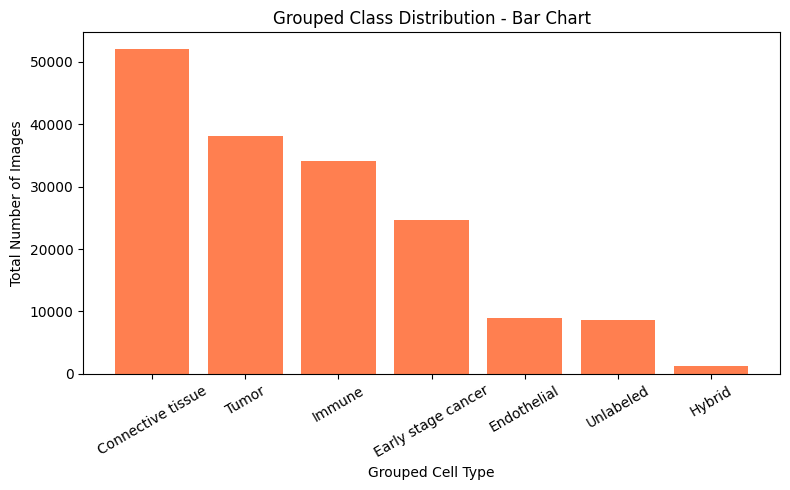

In [6]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict


# Path to the main folder containing class subfolders
main_folder = os.path.join(os.getcwd(), "100")

# Get all subfolder names (classes)
folder_names = [name for name in os.listdir(main_folder)
                if os.path.isdir(os.path.join(main_folder, name))]

# Print folder names
print("Subfolders (classes):")
for name in folder_names:
    print(name)

# Grouping map
cell_group_map = {
    # Immune
    "CD4+_T_Cells": "Immune",
    "CD8+_T_Cells": "Immune",
    "B_Cells": "Immune",
    "IRF7+_DCs": "Immune",
    "LAMP3+_DCs": "Immune",
    "Macrophages_1": "Immune",
    "Macrophages_2": "Immune",
    "Mast_Cells": "Immune",

    #hybrids
    "Stromal_and_T_Cell_Hybrid": "Hybrid",
    "T_Cell_and_Tumor_Hybrid": "Hybrid",

    # Tumor
    "Prolif_Invasive_Tumor": "Tumor",
    "Invasive_Tumor": "Tumor",

    #early stage cancer
    "DCIS_1": "Early stage cancer",
    "DCIS_2": "Early stage cancer",

    # Connective tissue
    "Stromal": "Connective tissue",
    "Perivascular-Like": "Connective tissue",
    "Myoepi_ACTA2+": "Connective tissue",
    "Myoepi_KRT15+": "Connective tissue",

    #endothelial
    "Endothelial": "Endothelial",

    # Unlabeled
    "Unlabeled": "Unlabeled"
}

# Default dict to store grouped folders
grouped_folders = defaultdict(list)

# List all subfolders and group them
for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):
        group = cell_group_map.get(folder, "Other/Unmapped")
        grouped_folders[group].append(folder)


# Dictionary to store class name and image count
class_counts = {}

# Iterate through each subfolder (class) in the main folder
for class_name in os.listdir(main_folder):
    class_path = os.path.join(main_folder, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path)
                       if os.path.isfile(os.path.join(class_path, f))]
        class_counts[class_name] = len(image_files)

# Compute grouped counts
group_counts = defaultdict(int)

for class_name, count in class_counts.items():
    group = cell_group_map.get(class_name, "Other/Unmapped")
    group_counts[group] += count

# Sort grouped counts
sorted_group_counts = dict(sorted(group_counts.items(), key=lambda x: x[1], reverse=True))

# Plotting Grouped Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(sorted_group_counts.keys(), sorted_group_counts.values(), color='coral')
plt.xlabel("Grouped Cell Type")
plt.ylabel("Total Number of Images")
plt.title("Grouped Class Distribution - Bar Chart")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Sort class counts by count descending
sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plotting a Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel("Cell Type / Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution - Bar Chart (Sorted)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pixel intensity per cell type

In [ ]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# --- Settings ---
main_folder = os.path.join(os.getcwd(), "100")
max_images_per_class = 100  # <-- Tune this number to balance speed & accuracy
resize_dim = (64, 64)       # <-- Resize to smaller shape to save compute

# --- Process each class ---
for class_name in os.listdir(main_folder):
    class_path = os.path.join(main_folder, class_name)
    if os.path.isdir(class_path):
        pixel_values = []

        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        sampled_images = random.sample(image_files, min(len(image_files), max_images_per_class))

        for img_name in sampled_images:
            print("wow")
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
                if img is not None:
                    img_resized = cv2.resize(img, resize_dim)  # Resize for speed
                    pixel_values.extend(img_resized.flatten())
            except Exception as e:
                print(f"Error with {img_name}: {e}")

        if pixel_values:
            print("here")
            # Plot histogram + KDE
            plt.figure(figsize=(10, 5))
            sns.histplot(pixel_values, bins=50, kde=True, color='skyblue')
            plt.title(f"Pixel Intensity Distribution - {class_name} ({len(sampled_images)} samples)")
            plt.xlabel("Pixel Intensity (0-255)")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.tight_layout()
            plt.show()


## Checking for 10.png

In [8]:

import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Path to the main folder
main_folder = os.path.join(os.getcwd(), "100")

matching_images = []

# Walk through each subfolder
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith("10.png"):
                full_path = os.path.join(subfolder_path, filename)
                matching_images.append(full_path)

# Print results
if matching_images:
    print("Found the following images ending with '10.png':")
    for img in matching_images:
        print(img)
else:
    print("No images ending with '10.png' were found.")



Found the following images ending with '10.png':
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Endothelial/cell_73_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Myoepi_ACTA2+/cell_72_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Myoepi_ACTA2+/cell_70_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Myoepi_ACTA2+/cell_76_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Myoepi_ACTA2+/cell_71_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Myoepi_ACTA2+/cell_43_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/CD8+_T_Cells/cell_67_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/DCIS_1/cell_37_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/DCIS_1/cell_59_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Stromal/cell_74_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Stromal/cell_26_10.png
/Users/tanvibangar/Desktop/DATA3888/group_project/100/Invasive_Tumo

## Checking image widths and heights for each subgroup

In [9]:
from PIL import Image
import random
import seaborn as sns
import pandas as pd

# Collect image resolution data
resolution_data = []

for group, folders in grouped_folders.items():
    for folder in folders:
        folder_path = os.path.join(main_folder, folder)
        if os.path.isdir(folder_path):
            image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif'))]
            sample_files = random.sample(image_files, min(100, len(image_files)))

            for img_name in sample_files:
                img_path = os.path.join(folder_path, img_name)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        resolution_data.append({
                            'Width': width,
                            'Height': height,
                            'Class': folder,
                            'Group': group
                        })
                except Exception as e:
                    print(f"Failed to open {img_path}: {e}")

# Convert to DataFrame
df_res = pd.DataFrame(resolution_data)

# === 1. SCATTER PLOT OF WIDTH vs HEIGHT === #
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_res, x='Width', y='Height', hue='Group', style='Group', alpha=0.7, s=60)
plt.title('Resolution Distribution of Sampled Images (100 per Class)')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend(title='Cell Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. BOXPLOTS PER GROUP FOR WIDTH & HEIGHT === #
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df_res, x='Group', y='Width', ax=axs[0], palette="Set3")
axs[0].set_title("Image Width per Group")
axs[0].tick_params(axis='x', rotation=30)

sns.boxplot(data=df_res, x='Group', y='Height', ax=axs[1], palette="Set2")
axs[1].set_title("Image Height per Group")
axs[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()
